In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pickle
%matplotlib inline

In [23]:
df=pd.read_csv("penguins.csv")

In [24]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [25]:
df.isna().any()

species              False
island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [26]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
species              333 non-null object
island               333 non-null object
bill_length_mm       333 non-null float64
bill_depth_mm        333 non-null float64
flipper_length_mm    333 non-null int64
body_mass_g          333 non-null int64
sex                  333 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [28]:
df["species"].unique().tolist()

['Adelie', 'Gentoo', 'Chinstrap']

In [29]:
df["island"].unique().tolist()

['Torgersen', 'Biscoe', 'Dream']

In [30]:
df["sex"].unique().tolist()

['male', 'female']

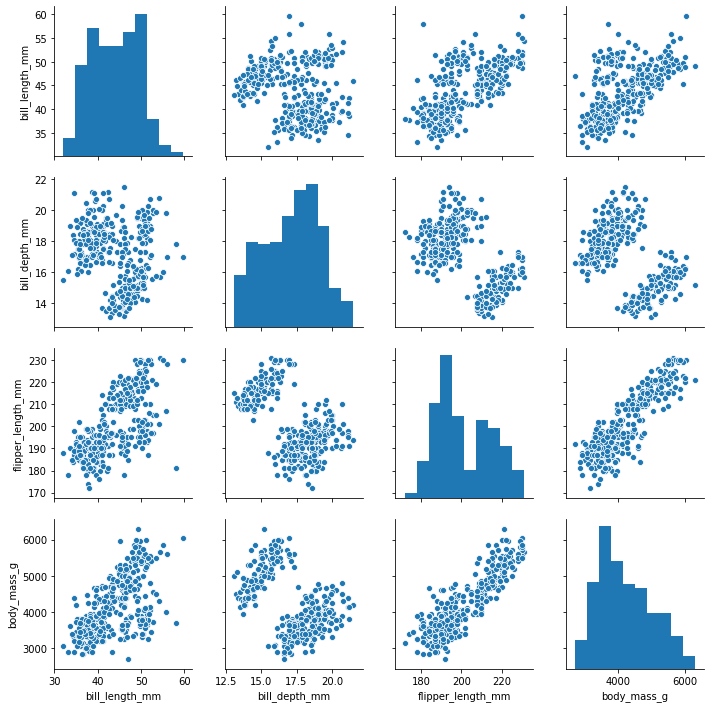

In [31]:
sns.pairplot(df)

In [32]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [33]:
to_encode=["island", "sex"]
for col in to_encode:
    dummy=pd.get_dummies(df[col], prefix=col)
    df=pd.concat([df,dummy], axis=1)
    del df[col]

In [34]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,Adelie,39.1,18.7,181,3750,0,0,1,0,1
1,Adelie,39.5,17.4,186,3800,0,0,1,1,0
2,Adelie,40.3,18.0,195,3250,0,0,1,1,0
3,Adelie,36.7,19.3,193,3450,0,0,1,1,0
4,Adelie,39.3,20.6,190,3650,0,0,1,0,1


In [35]:
y=df["species"]
X=df.drop("species", axis=1)

In [36]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181,3750,0,0,1,0,1
1,39.5,17.4,186,3800,0,0,1,1,0
2,40.3,18.0,195,3250,0,0,1,1,0
3,36.7,19.3,193,3450,0,0,1,1,0
4,39.3,20.6,190,3650,0,0,1,0,1


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [38]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [39]:
y_pred = svclassifier.predict(X_test)

In [40]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[35  0  0]
 [ 0  9  0]
 [ 0  0 23]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        35
   Chinstrap       1.00      1.00      1.00         9
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [41]:
y_pred = svclassifier.predict(X)
series = pd.Series(y_pred)
df_result= pd.concat([X, series], axis=1)

In [42]:
df_result.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,0
0,39.1,18.7,181,3750,0,0,1,0,1,Adelie
1,39.5,17.4,186,3800,0,0,1,1,0,Adelie
2,40.3,18.0,195,3250,0,0,1,1,0,Adelie
3,36.7,19.3,193,3450,0,0,1,1,0,Adelie
4,39.3,20.6,190,3650,0,0,1,0,1,Adelie


[Text(0, 0.5, 'Defense stat'), Text(0.5, 0, 'Attack stat')]

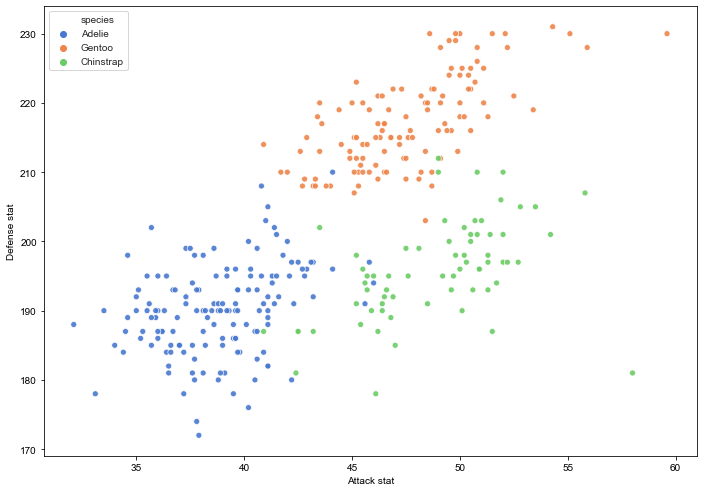

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("white")
X=df['bill_length_mm']
Y=df['flipper_length_mm']
ax = sns.scatterplot(x=X, y=Y, data=df,  
                     hue=df["species"],
                     alpha=.9, palette="muted")
ax.set(xlabel='Attack stat', ylabel='Defense stat')

[Text(0, 0.5, 'Defense stat'), Text(0.5, 0, 'bill_length')]

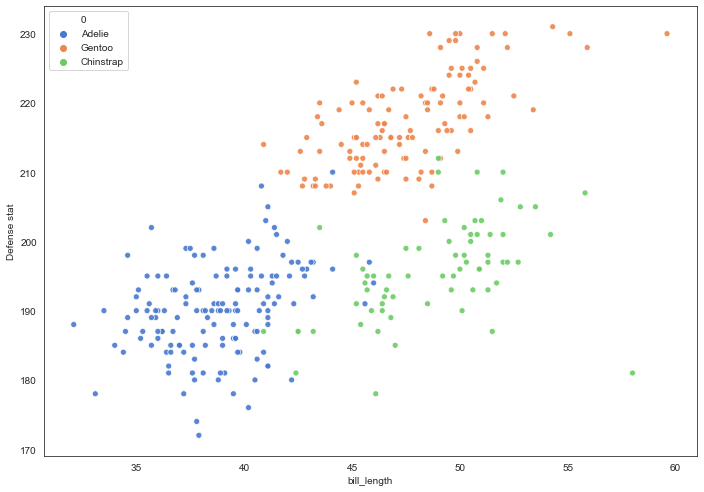

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("white")
X=df_result['bill_length_mm']
Y=df_result['flipper_length_mm']
ax = sns.scatterplot(x=X, y=Y, data=df_result,  
                     hue=df_result[0], 
                     alpha=.9, palette="muted")
ax.set(xlabel='bill_length', ylabel='Defense stat')

[Text(0, 0.5, 'Defense stat'), Text(0.5, 0, 'Attack stat')]

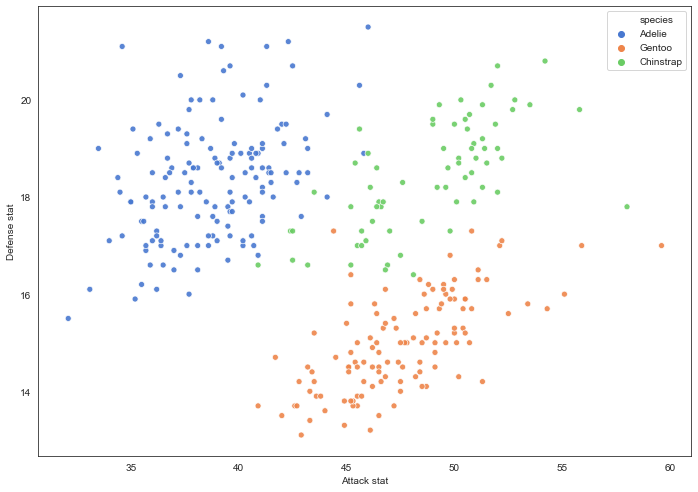

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("white")
X=df['bill_length_mm']
Y=df['bill_depth_mm']
ax = sns.scatterplot(x=X, y=Y, data=df,  
                     hue=df["species"],
                     alpha=.9, palette="muted")
ax.set(xlabel='Attack stat', ylabel='Defense stat')

[Text(0, 0.5, 'Defense stat'), Text(0.5, 0, 'Attack stat')]

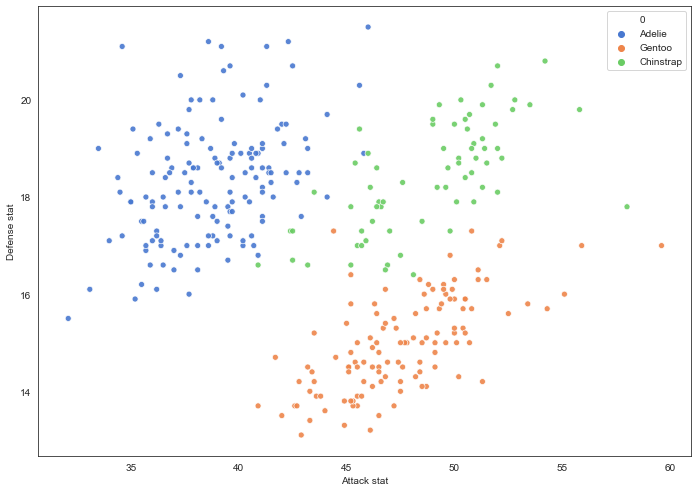

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("white")
X=df_result['bill_length_mm']
Y=df_result['bill_depth_mm']
ax = sns.scatterplot(x=X, y=Y, data=df_result,  
                     hue=df_result[0], 
                     alpha=.9, palette="muted")
ax.set(xlabel='Attack stat', ylabel='Defense stat')

In [47]:
filename = 'model.pkl'
pickle.dump(svclassifier, open(filename, 'wb'))

In [48]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

1.0
